# Neural Network - Risk prediction for Diabetes

## Method

### Data
The dataset is downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) . It consists of the following columns:
1. `Diabetes_binary`: *(Binary)* 0 = no diabetes; 1 = pre-diabetes or diabetes 
2. `HighBP`: *(Binary)* 0 = no high BP; 1 = high BP 
3. `HighChol`: *(Binary)* 0 = no high cholesterol; 1 = high cholesterol 
4. `CholCheck`: *(Binary)* 0 = no cholesterol check in 5 years; 1 = yes cholesterol check in 5 years 
5. `BMI`: *(Integer)* Body Mass Index 
6. `Smoker`: *(Binary)* Have you smoked at least 100 cigarettes in your entire life? \[Note: 5 packs = 100 cigarettes\] 0 = no; 1 = yes 
7. `Stroke`: *(Binary)* (Ever told) you had a stroke. 0 = no; 1 = yes 
8. `HeartDiseaseorAttack`: *(Binary)* coronary heart disease (CHD) or myocardial infarction (MI) 0 = no; 1 = yes 
9. `PhysActivity`: *(Binary)* physical activity in past 30 days - not including job 0 = no; 1 = yes 
10. `Fruits`: *(Binary)* Consume Fruit 1 or more times per day 0 = no; 1 = yes 
11. `Veggies`: *(Binary)* Consume Vegetables 1 or more times per day 0 = no; 1 = yes 
12. `HvyAlcoholConsump`: *(Binary)* Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no; 1 = yes 
13. `AnyHealthcare`: *(Binary)* Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no; 1 = yes 
14. `NoDocbcCost`: *(Binary)* Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no; 1 = yes 
15. `GenHlth`: *(Integer)* Would you say that in general your health is (scale 1-5): 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor 
16. `MentHlth`: *(Integer)* Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days 
17. `PhysHlth`: *(Integer)* Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days 
18. `DiffWalk`: *(Binary)* Do you have serious difficulty walking or climbing stairs? 0 = no; 1 = yes 
19. `Sex`: *(Binary)* Sex 0 = female; 1 = male 
20. `Age`: *(Integer)* Age. 13-level age category (AGEG5YR see codebook) 1 = 18-24; 2 = 25-29; ...; 13 = 80 or older 
21. `Education`: *(Integer)* Education Level. Education level (EDUCA see codebook) (scale 1-6) 1 = Never attended school or only kindergarten; 2 = Grades 1 through 8 (Elementary); 3 = Grades 9 through 11 (Some high school); 4 = Grade 12 or GED (High school graduate); 5 = College 1 year to 3 years (Some college or technical school); 6 = College 4 years or more (College graduate) 
22. `Income`: *(Integer)* Income. Income scale (INCOME2 see codebook) (scale 1-8) 1 = less than \\$10,000; 2 = \\$10,000 to less than \\$15,000;...; 8 = \\$75,000 or more

The schema can be download from [Centers for Disease Control and Prevention (CDC)](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf). The data source does not specify the type of diabetes, whether it's type 1 or type 2. Consequently, determining the Bayes error by examining the performance of other models becomes challenging. Therefore, for the purpose of this demonstration, we will not concentrate on reducing the gap between the Bayes error and the training error

### Model

<div style="display: flex; align-items: center; justify-content: space-around;">
    <img src="image/Neural-Networks-Architecture.png" alt="Neural Networks Architecture" style="width: 45%; height: auto;">
    <img src="image/neuron.webp" alt="Neuron" style="width: 45%; height: auto;">
</div>

In this analysis, the artificial neural network (ANN) will be built for modelling.
Each ANN consists of 3 parts
1. **Input layer**: It forms the first layer of the network. It is responsible for receiving the initial data or input. Each node in the input layer represents a feature from the dataset being fed into the network.
2. **Output layer**: It is the final layer of the network. Its purpose is to make the prediction. The neurons represents the target variables or classes that the network tries to predict.
3. **Hidden layers**: They are located between the input layer and output layer. They process the inputs received from previous layer and pass the processed information the next layer. Each hidden layer also consists of neurons representing values are not observed in the training set. The neurons between hidden layers are connected to each other. The above graph on the left shows all connections of a network.

To train an ANN, the following 2 processes were performed.

**Forward propagation**: The data from the input layer passes through the hidden layers and then reach the output layer. In each neuron, a weighted sum of the input would be calculated. The sum with the addition of the bias is then passed to an activation function. The weights and bias are the parameters of the network. Mathematical formula are shown below. In TensorFlow, by default, weights are initialized using the Xavier initializer, while biases are initialized to a vector of zeros. For the next process, the loss is also calculated by comparing the actual and predicted value.

Denote 
* $l$: number of layers. Its value ranges from $1$ to $L$. The first layer refers to the first hidden layer. The last layer or Layer $L$ refers to the output layer
* $n^{[0]}$ or $n_{x}$: number of features
* $n^{[l]}$: number of neurons in Layer $l$
* $x = \begin{bmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{n_{x}} \end{bmatrix} = a^{[0]} \in \mathbb{R}^{(n_{x},1)}$: features or activation values at input layer for 1 sample
* $a^{[l]} \in \mathbb{R}^{(n^{[l]},1)}$: activation for Layer $l$
* $W^{[l]} \in \mathbb{R}^{(n^{[l]}, n^{[l-1]})}$ : weight matrix for Layer $l$
* $b^{[l]} \in \mathbb{R}^{(n^{[l]},1)}$: bias for Layer $l$
* $g^{[l]}$: activation function for Layer $l$


$$\begin{align*} z^{[l]} &= W^{[l]} a^{[l-1]}+b^{[l]} \in \mathbb{R}^{(n^{[l]},1)} 
\\ 
\begin{bmatrix} z_{1}^{[l]} \\ z_{2}^{[l]} \\ \vdots \\ z_{n^{[l]}}^{[l]} \end{bmatrix} &= \begin{bmatrix}  {w_{1}^{[l]}}^{T}  \\  {w_{2}^{[l]}}^{T}  \\  \vdots  \\  {w_{n^{[l]}}^{[l]}}^{T}  \end{bmatrix} \begin{bmatrix} a_{1}^{[l-1]} \\ a_{2}^{[l-1]} \\ \vdots \\ a_{n^{[l-1]}}^{[l-1]} \end{bmatrix} + \begin{bmatrix} b_{1}^{[l]} \\ b_{2}^{[l]} \\ \vdots \\ b_{n^{[l]}}^{[l]} \end{bmatrix}

= \begin{bmatrix} {w_{1}^{[l]}}^{T} a^{[l-1]} + b_{1}^{[1]} \\ {w_{2}^{[l]}}^{T} a^{[l-1]} + b_{2}^{[1]} \\ 
\vdots \\ 
{w_{n^{[l]}}^{[l]}}^{T} a^{[l-1]} + b_{n^{[l]}}^{[1]}
\end{bmatrix} \\ \\

a^{[l]} &= g^{[l]}(z^{[l]}) \in \mathbb{R}^{(n^{[l]},1)} \\ 
\begin{bmatrix} a^{[l]}_{1} \\ a^{[l]}_{2} \\ \vdots \\ a^{[l]}_{n^{[l]}} \end{bmatrix} &= \begin{bmatrix} g^{[l]}(z_{1}^{[l]}) \\ g^{[l]}(z_{2}^{[l]}) \\ \vdots \\ g^{[l]}(z_{n^{[l]}}^{[l]}) \end{bmatrix}
\\ \\ 
\hat{y} &= a^{[L]}
\end{align*}$$

**Backpropagation**: In contrast, backpropagation starts from the output layer to the first hidden layer. It calculates the gradient of the loss function with respect to the parameter of weights and bias by using the chain rule. The gradient will then be used to update the parameters. To perform the optimisation, it is common to choose batch gradient descent or Adam algorithm.
The above 2 processes were repeated until the parameters are convergent


## Analysis

In [208]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.regularizers import l2

In [2]:
path_data = "data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df0 = pd.read_csv(path_data)

### Data checking

#### Dimension

In [4]:
print(f"Number of rows: {df0.shape[0]}")
print(f"Number of columns: {df0.shape[1]}")

Number of rows: 70692
Number of columns: 22


#### Data type

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

#### Missing data

In [217]:
df0.isnull().mean() * 100

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
target                  0.0
BMI_scaled              0.0
PhysHlth_group          0.0
MentHlth_group          0.0
PhysHlth_encoded        0.0
MentHlth_encoded        0.0
dtype: float64

* No missing value

### Data exploration

In [7]:
mapping_binary = {0: "No", 1: "Yes"}
mapping_genhlth = {1: "Excellent", 2: "Very Good", 3: "Good", 4: "Fair", 5: "Poor"}
mapping_gender = {0: "Female", 1: "Male"}
mapping_age = {1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39", 5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59", 9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79", 13: "80 or older"}
mapping_edu = {
  1: "Never / Kindergarten",
  2: "Elementary",
  3: "Some high school",
  4: "High school graduate",
  5: "Some college / Technical school",
  6: "College graduate"
}
mapping_income = {
  1: "≤$10k",
  2: "\\$10k-$<15k",
  3: "\\$15k-$<20k",
  4: "\\$20k-$<25k",
  5: "\\$25k-$<35k",
  6: "\\$35k-$<50k",
  7: "\\$50k-$<75k",
  8: "≥$75k"
}

In [8]:
def create_order_level(mapping):
    return [mapping[item] for item in range(1,len(mapping)+1)]
order_genhlth = create_order_level(mapping_genhlth)[::-1]
order_age = create_order_level(mapping_age)
order_edu = create_order_level(mapping_edu)
order_income = create_order_level(mapping_income)

In [9]:
def plot_binary(df, target, features, titles, grid_shape, figure_size, bounding_box, mapping=mapping_binary):
    fig, axes = plt.subplots(grid_shape[0], grid_shape[1], figsize=figure_size)
    axes = axes.flatten()
    for i, (feature, title) in enumerate(zip(features, titles)):
        x = df[feature].map(mapping)
        y = df[target]
        df_crosstab = pd.crosstab(x, y, dropna=False, normalize="index")
        df_crosstab.plot.bar(rot=0, ax=axes[i])
        # for container in axes[i].containers:
        #     axes[i].bar_label(container, fmt="%.2f")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Percentage")
        axes[i].set_title(title, fontsize=10)
        axes[i].legend().remove() 
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", bbox_to_anchor=bounding_box, bbox_transform=plt.gcf().transFigure)
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

#### Target

In [10]:
df0["target"] = df0["Diabetes_binary"].map(mapping_binary)
df0["target"].value_counts()

target
No     35346
Yes    35346
Name: count, dtype: int64

* The dataset is balanced

#### Feature

##### Health

* There are 6 variables related to patients' health: `HighBP`_(binary)_, `HighChol`_(binary)_, `BMI`_(numerical)_, `Stroke`_(binary)_, `HeartDiseaseorAttack`_(binary)_, `DiffWalk`_(binary)_

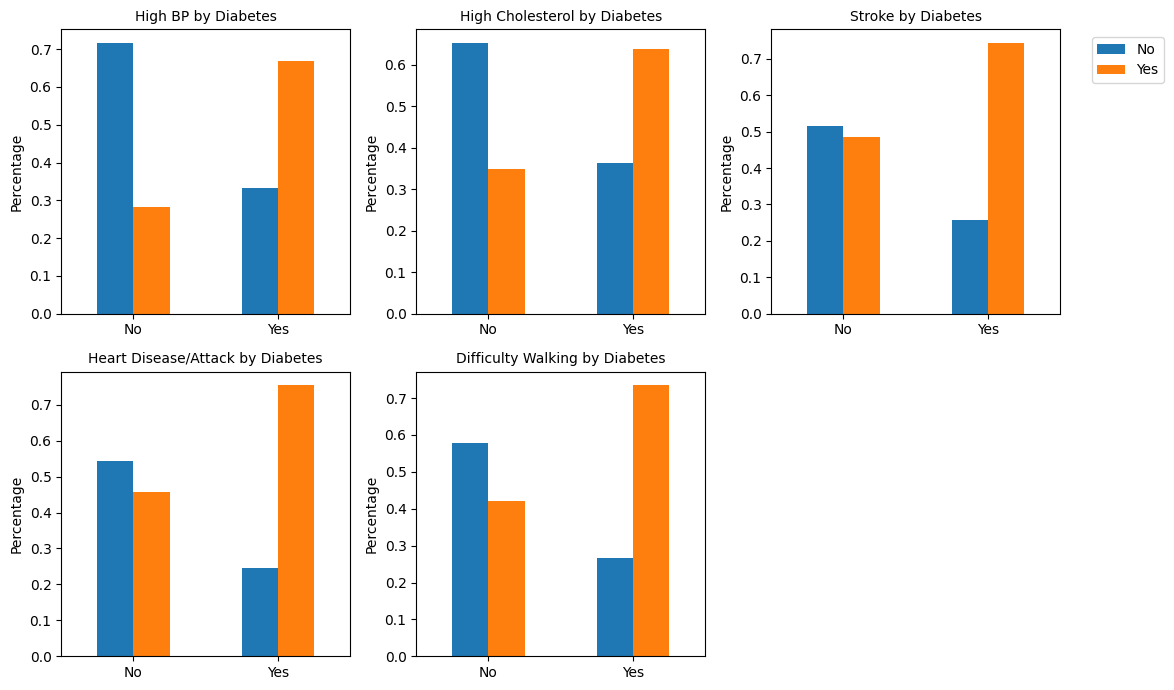

In [70]:
features = ["HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", "DiffWalk"]
titles = ["High BP", "High Cholesterol", "Stroke", "Heart Disease/Attack", "Difficulty Walking"]
titles = [title + " by Diabetes" for title in titles]
plot_binary(df0, "target", features, titles, grid_shape=(2, 3), figure_size=(12, 7), bounding_box=(0.98, 0.95))

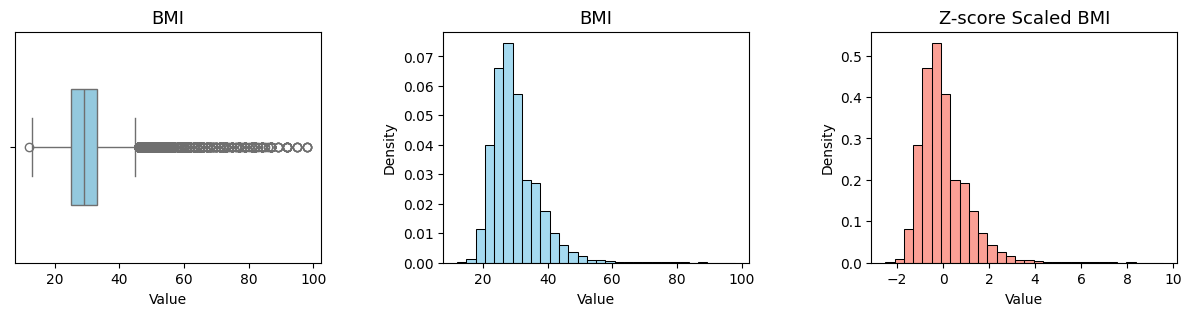

In [71]:
# BMI
scaler = StandardScaler(with_std=True)
df0["BMI_scaled"] = scaler.fit_transform(df0[["BMI"]]).flatten()

plt.figure(figsize=(15, 3))
plt.subplot(1, 3, 1)
sns.boxplot(x ="BMI", data=df0, orient="h", width=0.5, color="skyblue")
plt.xlabel("Value")
plt.ylabel("")
plt.title("BMI", fontsize=13)

plt.subplot(1, 3, 2)
sns.histplot(x="BMI", data=df0, bins=30, kde=False, color="skyblue", stat="density")
plt.xlabel("Value")
plt.title("BMI", fontsize=13)

plt.subplot(1, 3, 3)
sns.histplot(x="BMI_scaled", data=df0, bins=30, kde=False, color="salmon", stat="density")
plt.xlabel("Value")
plt.title("Z-score Scaled BMI", fontsize=13)

plt.subplots_adjust(wspace=0.4)
plt.show()

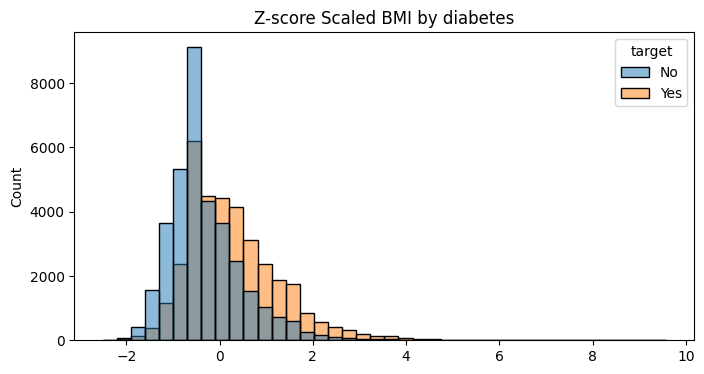

In [72]:
plt.figure(figsize=(8, 4))
sns.histplot(x="BMI_scaled", data=df0, hue="target", bins=40)
plt.title("Z-score Scaled BMI by diabetes")
plt.xlabel("")
plt.show()

##### Perceived health

* There are 3 variables related to preceived health: `GenHlth`_(ordinal)_, `MentHlth`_(numerical)_, `PhysHlth`_(numerical)_

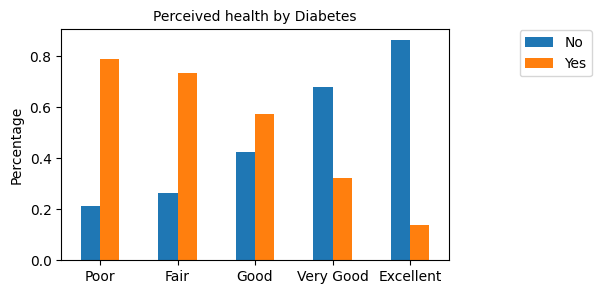

In [73]:
cat_type = pd.CategoricalDtype(categories=order_genhlth, ordered=True)
x = df0["GenHlth"].map(mapping_genhlth).astype(cat_type)

df_crosstab = pd.crosstab(x, df0["target"], dropna=False, normalize="index")
fig, ax = plt.subplots(figsize=(5, 3))
df_crosstab.plot.bar(rot=0, ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Percentage")
ax.set_title("Perceived health by Diabetes", fontsize=10)
ax.legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.2, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

In [74]:
# bins = [-1, 0, 15, 30]
# labels = ["0", "1-15", "16-30"]
# bins = [-1, 0, 10, 20, 30]
# labels = ['0', '1-10', '11-20', '21-30']
bins = [-1, 0, 7, 14, 21, 28, 30]
labels = ['0', '1-7', '8-14', '15-21', '22-28', '29-30']
df0["PhysHlth_group"] = pd.cut(df0["PhysHlth"], bins=bins, labels=labels)
df0["MentHlth_group"] = pd.cut(df0["MentHlth"], bins=bins, labels=labels)

In [75]:
def compare_day_grouping(feature_before_group, feature_after_group, title):
    # Prepare data for first plot
    df_crosstab1 = df0[feature_before_group].value_counts(normalize=True).sort_index() * 100
    df_crosstab1 = df_crosstab1.to_frame().reset_index(drop=False).rename(columns={"proportion": "percentage"})
    df_crosstab1[feature_before_group] = df_crosstab1[feature_before_group].astype("int64")

    # Prepare data for second plot
    df_crosstab2 = df0[feature_after_group].value_counts(normalize=True).sort_index() * 100
    df_crosstab2 = df_crosstab2.to_frame().reset_index(drop=False).rename(columns={"proportion": "percentage"})

    # Create a figure with GridSpec
    fig = plt.figure(figsize=(11, 3))
    gs = fig.add_gridspec(1, 3)

    # Create the first subplot (2/3 of the figure)
    ax1 = fig.add_subplot(gs[0, :2])
    sns.barplot(data=df_crosstab1, x=feature_before_group, y="percentage", ax=ax1)
    ax1.set_title(f"{title} before grouping")
    ax1.set_xlabel("Number of days")

    # Create the second subplot (1/3 of the figure)
    ax2 = fig.add_subplot(gs[0, 2])
    sns.barplot(data=df_crosstab2, x=feature_after_group, y="percentage", ax=ax2)
    ax2.set_title(f"{title} after grouping")
    ax2.set_xlabel("Number of days")

    plt.tight_layout()
    plt.show()

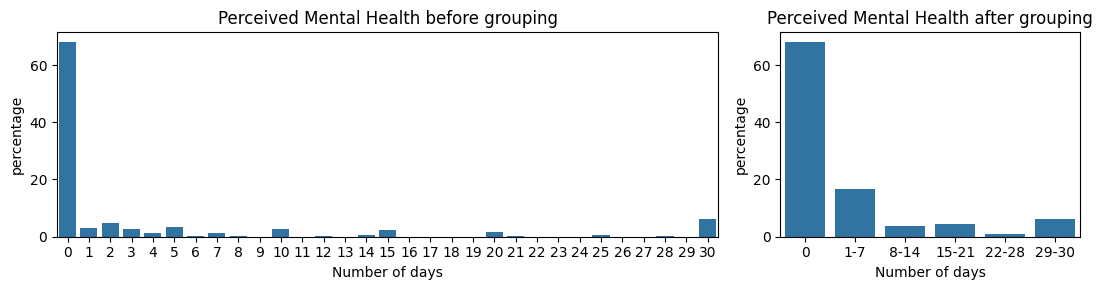

In [76]:
compare_day_grouping("MentHlth", "MentHlth_group", "Perceived Mental Health")

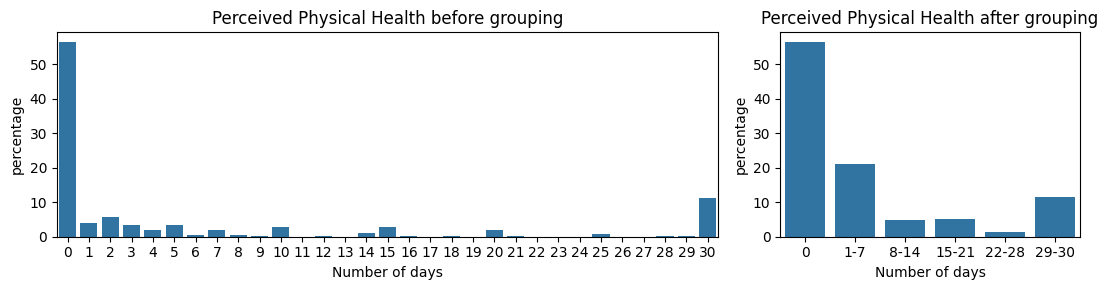

In [77]:
compare_day_grouping("PhysHlth", "PhysHlth_group", "Perceived Physical Health")

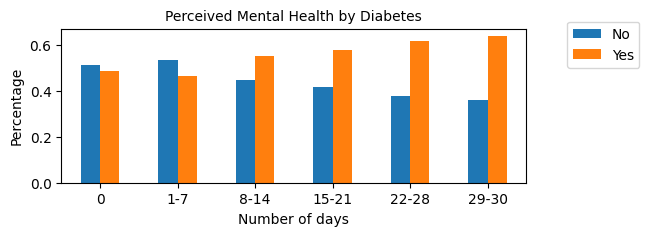

In [78]:
fig, ax = plt.subplots(figsize=(6, 2))
df = pd.crosstab(df0["MentHlth_group"], df0["target"], dropna=False, normalize="index")
ax = df.plot.bar(rot=0,ax=ax)
ax.set_xlabel("Number of days")
ax.set_ylabel("Percentage")
ax.set_title("Perceived Mental Health by Diabetes", fontsize=10)
ax.legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.1,0.95), bbox_transform=plt.gcf().transFigure)
plt.show()

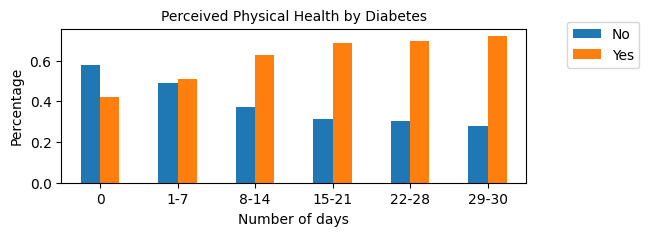

In [79]:
fig, ax = plt.subplots(figsize=(6, 2))
df = pd.crosstab(df0["PhysHlth_group"], df0["target"], dropna=False, normalize="index")
ax = df.plot.bar(rot=0,ax=ax)
ax.set_xlabel("Number of days")
ax.set_ylabel("Percentage")
ax.set_title("Perceived Physical Health by Diabetes", fontsize=10)
ax.legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.1,0.95), bbox_transform=plt.gcf().transFigure)
plt.show()

##### Lifestyle

* There are 6 variables related to lifestyle: `CholCheck`_(binary)_, `Smoker`_(binary)_, `PhysActivity`_(binary)_, `Fruits`_(binary)_, `Veggies`_(binary)_, `HvyAlcoholConsump`_(binary)_

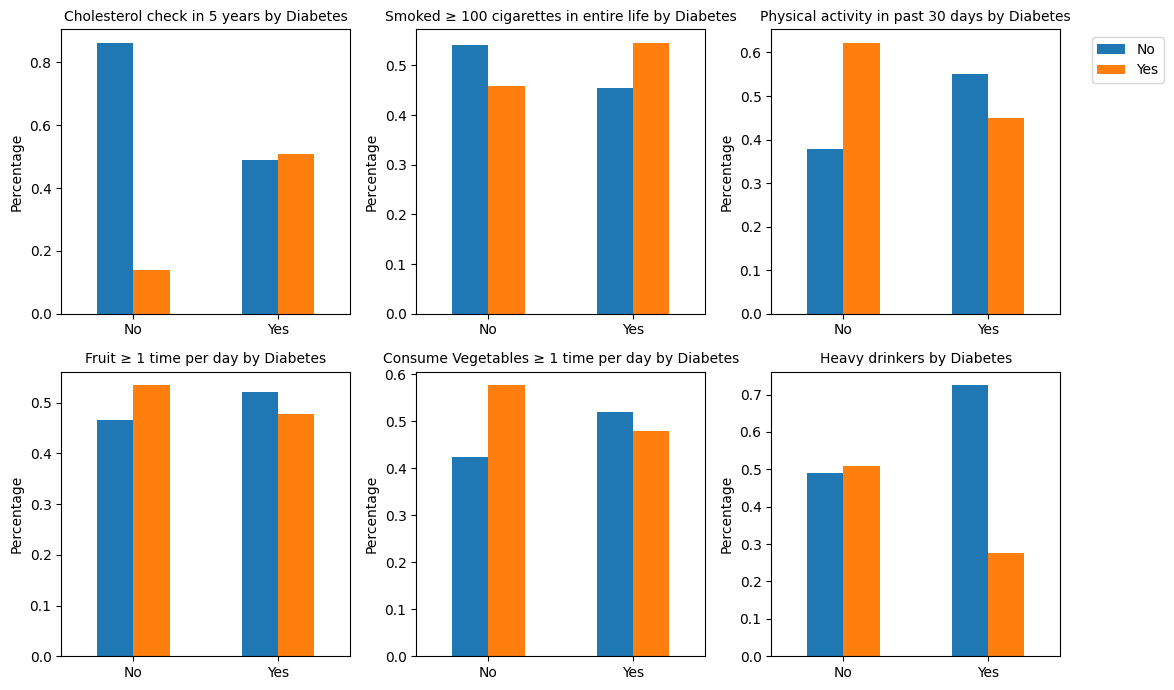

In [80]:
features = ["CholCheck", "Smoker", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump"]
titles = ["Cholesterol check in 5 years", "Smoked ≥ 100 cigarettes in entire life", "Physical activity in past 30 days", "Fruit ≥ 1 time per day", "Consume Vegetables ≥ 1 time per day", "Heavy drinkers"]
titles = [title + " by Diabetes" for title in titles]
plot_binary(df0, "target", features, titles, grid_shape=(2, 3), figure_size=(12, 7), bounding_box=(0.98, 0.95))

##### Financial difficulty

* There are 2 variables related to financial difficulty: `AnyHealthcare`_(binary)_ and `NoDocbcCost`_(binary)_

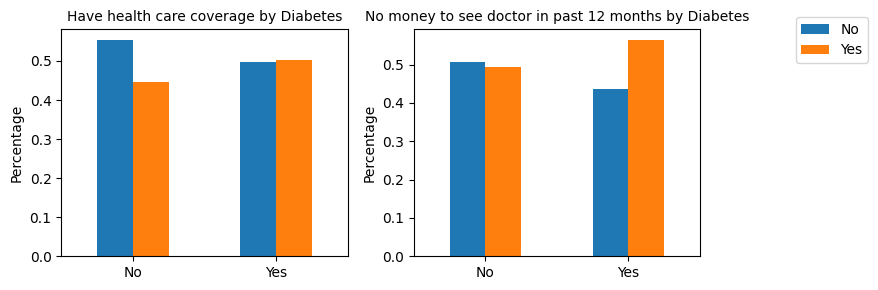

In [81]:
features = ["AnyHealthcare", "NoDocbcCost"]
titles = ["Have health care coverage", "No money to see doctor in past 12 months"]
titles = [title + " by Diabetes" for title in titles]
plot_binary(df0, "target", features, titles, grid_shape=(1, 2), figure_size=(8, 3), bounding_box=(1.1, 0.95))

##### Demographic

* There are 4 demographic variables: `Sex`_(binary)_, `Age`_(ordinal)_, `Education`_(ordinal)_, `Income`_(ordinal)_

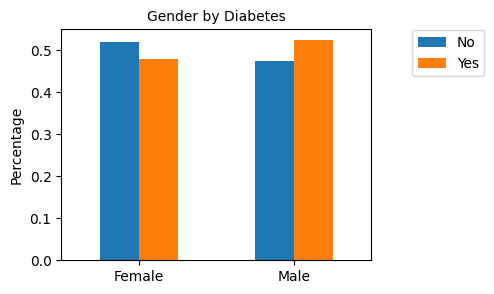

In [82]:
# Sex
df_crosstab = pd.crosstab(df0["Sex"].map(mapping_gender), df0["target"], dropna=False, normalize="index")
fig, ax = plt.subplots(figsize=(4, 3))
df_crosstab.plot.bar(rot=0, ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Percentage")
ax.set_title("Gender by Diabetes", fontsize=10)
ax.legend().remove()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.2, 0.9), bbox_transform=plt.gcf().transFigure)
plt.show()

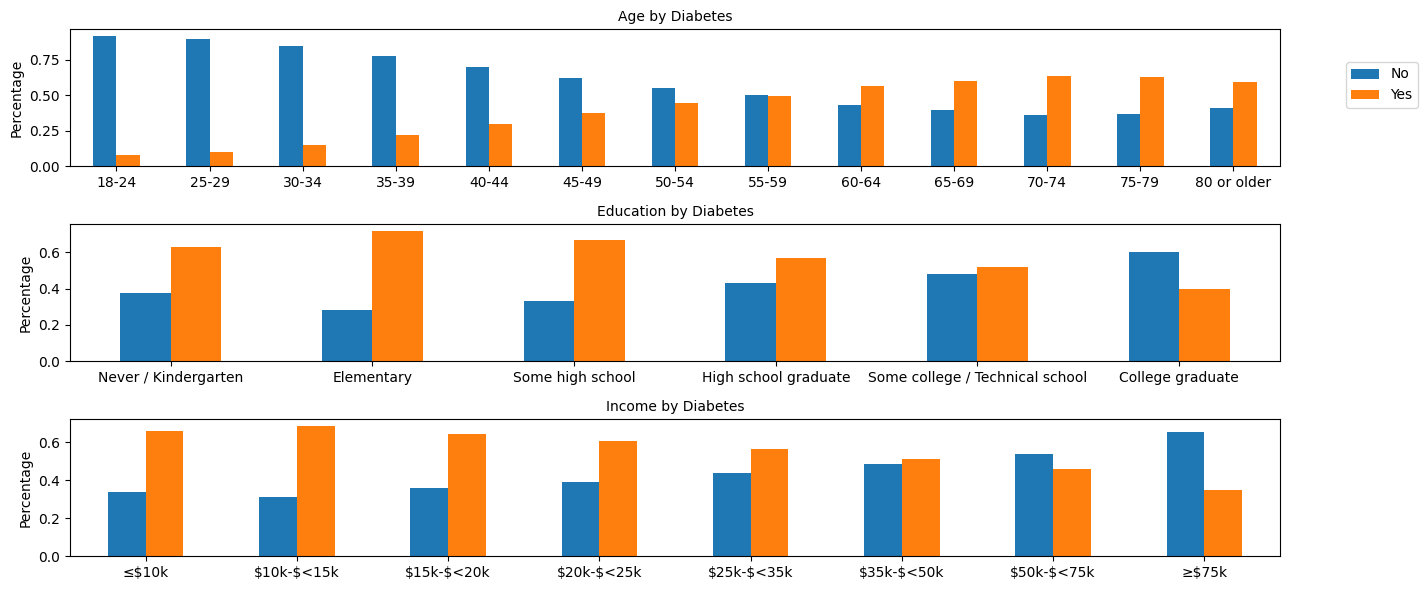

In [83]:
fig, axes = plt.subplots(3, 1, figsize=(13, 6))
axes = axes.flatten()

y = df0["target"]

cat_type = pd.CategoricalDtype(categories=order_age, ordered=True)
x = df0["Age"].map(mapping_age).astype(cat_type)
df_crosstab = pd.crosstab(x, y, dropna=False, normalize="index")
df_crosstab.plot.bar(rot=0, ax=axes[0])
axes[0].set_xlabel("")
axes[0].set_ylabel("Percentage")
axes[0].set_title("Age by Diabetes", fontsize=10)
axes[0].legend().remove()

cat_type = pd.CategoricalDtype(categories=order_edu, ordered=True)
x = df0["Education"].map(mapping_edu).astype(cat_type)
df_crosstab = pd.crosstab(x, y, dropna=False, normalize="index")
df_crosstab.plot.bar(rot=0, ax=axes[1])
axes[1].set_xlabel("")
axes[1].set_ylabel("Percentage")
axes[1].set_title("Education by Diabetes", fontsize=10)
axes[1].legend().remove()

cat_type = pd.CategoricalDtype(categories=order_income, ordered=True)
x = df0["Income"].map(mapping_income).astype(cat_type)
df_crosstab = pd.crosstab(x, y, dropna=False, normalize="index")
df_crosstab.plot.bar(rot=0, ax=axes[2])
axes[2].set_xlabel("")
axes[2].set_ylabel("Percentage")
axes[2].set_title("Income by Diabetes", fontsize=10)
axes[2].legend().remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.1, 0.9), bbox_transform=plt.gcf().transFigure)

plt.tight_layout()
plt.show()

### Data preprocessing

#### Encoding

In [40]:
ordinal_encoder = OrdinalEncoder(categories=[["0", "1-7", "8-14", "15-21", "22-28", "29-30"]])
df0["PhysHlth_encoded"] = ordinal_encoder.fit_transform(df0[["PhysHlth_group"]])
df0["MentHlth_encoded"] = ordinal_encoder.fit_transform(df0[["MentHlth_group"]])

In [41]:
df1 = df0.drop(columns=["target", "BMI", "MentHlth", "PhysHlth", "PhysHlth_group", "MentHlth_group"])

#### Split dataset

In [45]:
X = df1.iloc[:, 1:].values
y = df1.iloc[:,0].values

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data modelling

#### Baseline model

In [62]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=["accuracy"], 
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-08))

In [98]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [99]:
training_accuracy = history.history["accuracy"][-1] * 100
validation_accuracy = history.history["val_accuracy"][-1] * 100
print(f"Training accuracy: {round(training_accuracy, 2)}")
print(f"Validation accuracy: {round(validation_accuracy, 2)}")

Training accuracy: 78.38
Validation accuracy: 73.58


* Although we did not know Bayes error, let's try if the training accuracy can be improved

#### Model tuning

##### Reduce avoidable bias
* To reduce the gap between Bayes error and training error, a bigger network is fitted

In [124]:
def build_model(hp): 
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for i in range(hp.Int("num_layers", 2, 4)):
        model.add(Dense(hp.Int(f"units_{i}", min_value=32, max_value=128, step=32), activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], 
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-08))
    return model

In [132]:
tuner = kt.RandomSearch(
    build_model,
    objective="accuracy",
    max_trials=10,
    executions_per_trial=1,
    directory="hide",
    project_name="train bigger model_v2"
)

In [133]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}


In [134]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 10 Complete [00h 00m 48s]
accuracy: 0.7604880332946777

Best accuracy So Far: 0.7895981669425964
Total elapsed time: 00h 09m 07s


In [176]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"The best NN architecture: {best_hp.values}")

The best NN architecture: {'num_layers': 3, 'units_0': 128, 'units_1': 128, 'units_2': 32}


In [138]:
tuner.results_summary(1)

Results summary
Results in hide/train bigger model_v2
Showing 1 best trials
Objective(name="accuracy", direction="max")

Trial 00 summary
Hyperparameters:
num_layers: 3
units_0: 128
units_1: 128
units_2: 32
Score: 0.7895981669425964


In [169]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
training_accuracy = best_trial.metrics.get_history("accuracy")
validation_accuracy = best_trial.metrics.get_history("val_accuracy")
training_accuracy = [metric.value for metric in training_accuracy][0][0]
validation_accuracy = [metric.value for metric in validation_accuracy][0][0]

In [173]:
print(f"Training accuracy: {round(training_accuracy*100, 2)}")
print(f"Validation accuracy: {round(validation_accuracy*100, 2)}")

Training accuracy: 78.96
Validation accuracy: 73.42


* The training accuracy only improves slightly

##### Reduce variance
* To reduce variance, L2 regularisation was added

In [183]:
def build_model(hp): 
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(128, activation="relu", kernel_regularizer=l2(hp.Float("l2_0", min_value=1e-5, max_value=1e-2, sampling="LOG"))))
    model.add(Dense(128, activation="relu", kernel_regularizer=l2(hp.Float("l2_1", min_value=1e-5, max_value=1e-2, sampling="LOG"))))
    model.add(Dense(32, activation="relu", kernel_regularizer=l2(hp.Float("l2_2", min_value=1e-5, max_value=1e-2, sampling="LOG"))))

    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", metrics=["accuracy"], 
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-08))
    return model

In [184]:
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    directory="hide",
    project_name="l2_tuning_v1"
)

In [185]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
l2_0 (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
l2_1 (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
l2_2 (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [186]:
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.7536026835441589

Best val_accuracy So Far: 0.7536026835441589
Total elapsed time: 00h 02m 11s


In [187]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hp.values)

{'l2_0': 1.7712345526835492e-05, 'l2_1': 5.101462250647536e-05, 'l2_2': 0.003332283580166981}


In [188]:
tuner.results_summary(1)

Results summary
Results in hide/l2_tuning_v1
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
l2_0: 1.7712345526835492e-05
l2_1: 5.101462250647536e-05
l2_2: 0.003332283580166981
Score: 0.7536026835441589


In [189]:
best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
training_accuracy = best_trial.metrics.get_history("accuracy")
validation_accuracy = best_trial.metrics.get_history("val_accuracy")
training_accuracy = [metric.value for metric in training_accuracy][0][0]
validation_accuracy = [metric.value for metric in validation_accuracy][0][0]

In [190]:
print(f"Training accuracy: {round(training_accuracy*100, 2)}")
print(f"Validation accuracy: {round(validation_accuracy*100, 2)}")

Training accuracy: 75.21
Validation accuracy: 75.36


* The validation accuracy improved from 73.42% to 75.36%

#### Model evaluation

In [192]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,489 (91.75 KB)

 Trainable params: 23,489 (91.75 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.7553 - loss: 0.5016


In [197]:
print(f"Test accuracy: {round(test_accuracy*100, 2)}")

Test accuracy: 75.29
